# Loan Prediction Model

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Display all of the columns
pd.set_option('display.max_columns', None)

In [3]:
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv("../Resources/loan_approval_dataset.csv")
data.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [36]:
data.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

## Exploaratory Data Analysis

<Figure size 800x600 with 0 Axes>

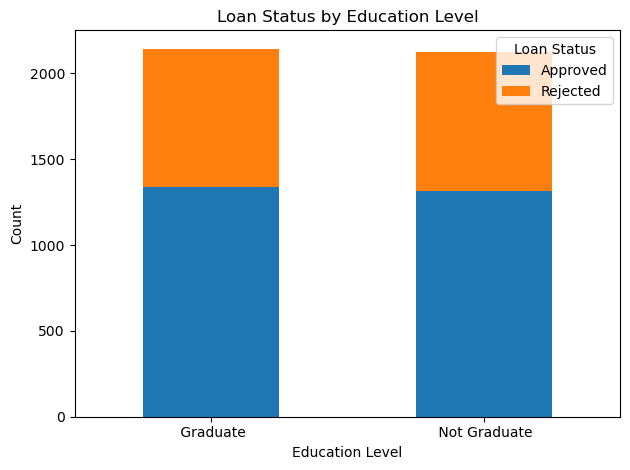

In [37]:
# Check for leading/trailing whitespaces in the column names
data.columns = data.columns.str.strip()

if 'education' in data.columns and 'loan_status' in data.columns:
    # Group the data by 'education' and 'loan_status' and count the occurrences
    education_loan_status_counts = data.groupby(['education', 'loan_status']).size().unstack()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

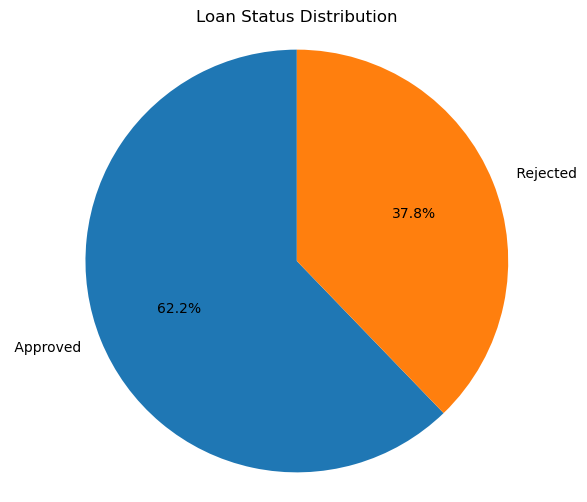

In [10]:
# Count the number of occurrences for each loan status
loan_status_counts = data['loan_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Figure size 800x600 with 0 Axes>

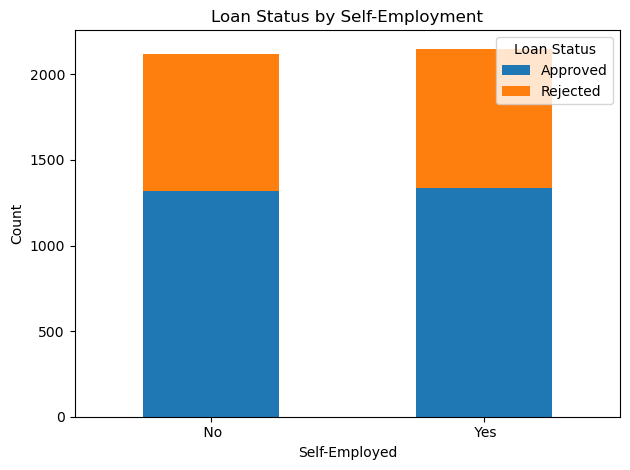

In [7]:
data.columns = data.columns.str.strip()

if 'self_employed' in data.columns and 'loan_status' in data.columns:
    # Group the data by 'education' and 'loan_status' and count the occurrences
    education_loan_status_counts = data.groupby(['self_employed', 'loan_status']).size().unstack()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Self-Employment')
    plt.xlabel('Self-Employed')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

<Figure size 800x600 with 0 Axes>

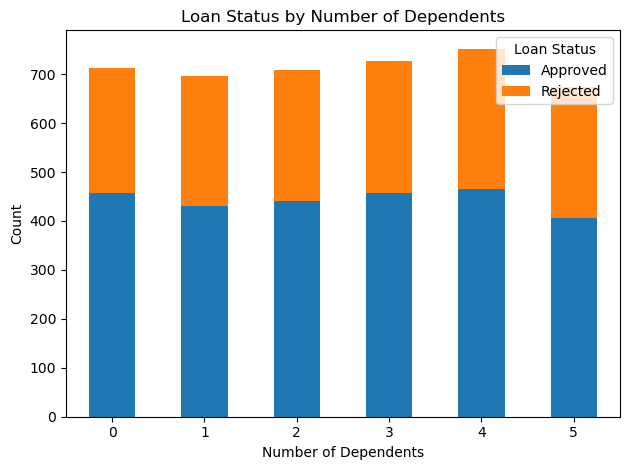

In [9]:
if 'no_of_dependents' in data.columns and 'loan_status' in data.columns:
    # Group the data by 'education' and 'loan_status' and count the occurrences
    education_loan_status_counts = data.groupby(['no_of_dependents', 'loan_status']).size().unstack()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Number of Dependents')
    plt.xlabel('Number of Dependents')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

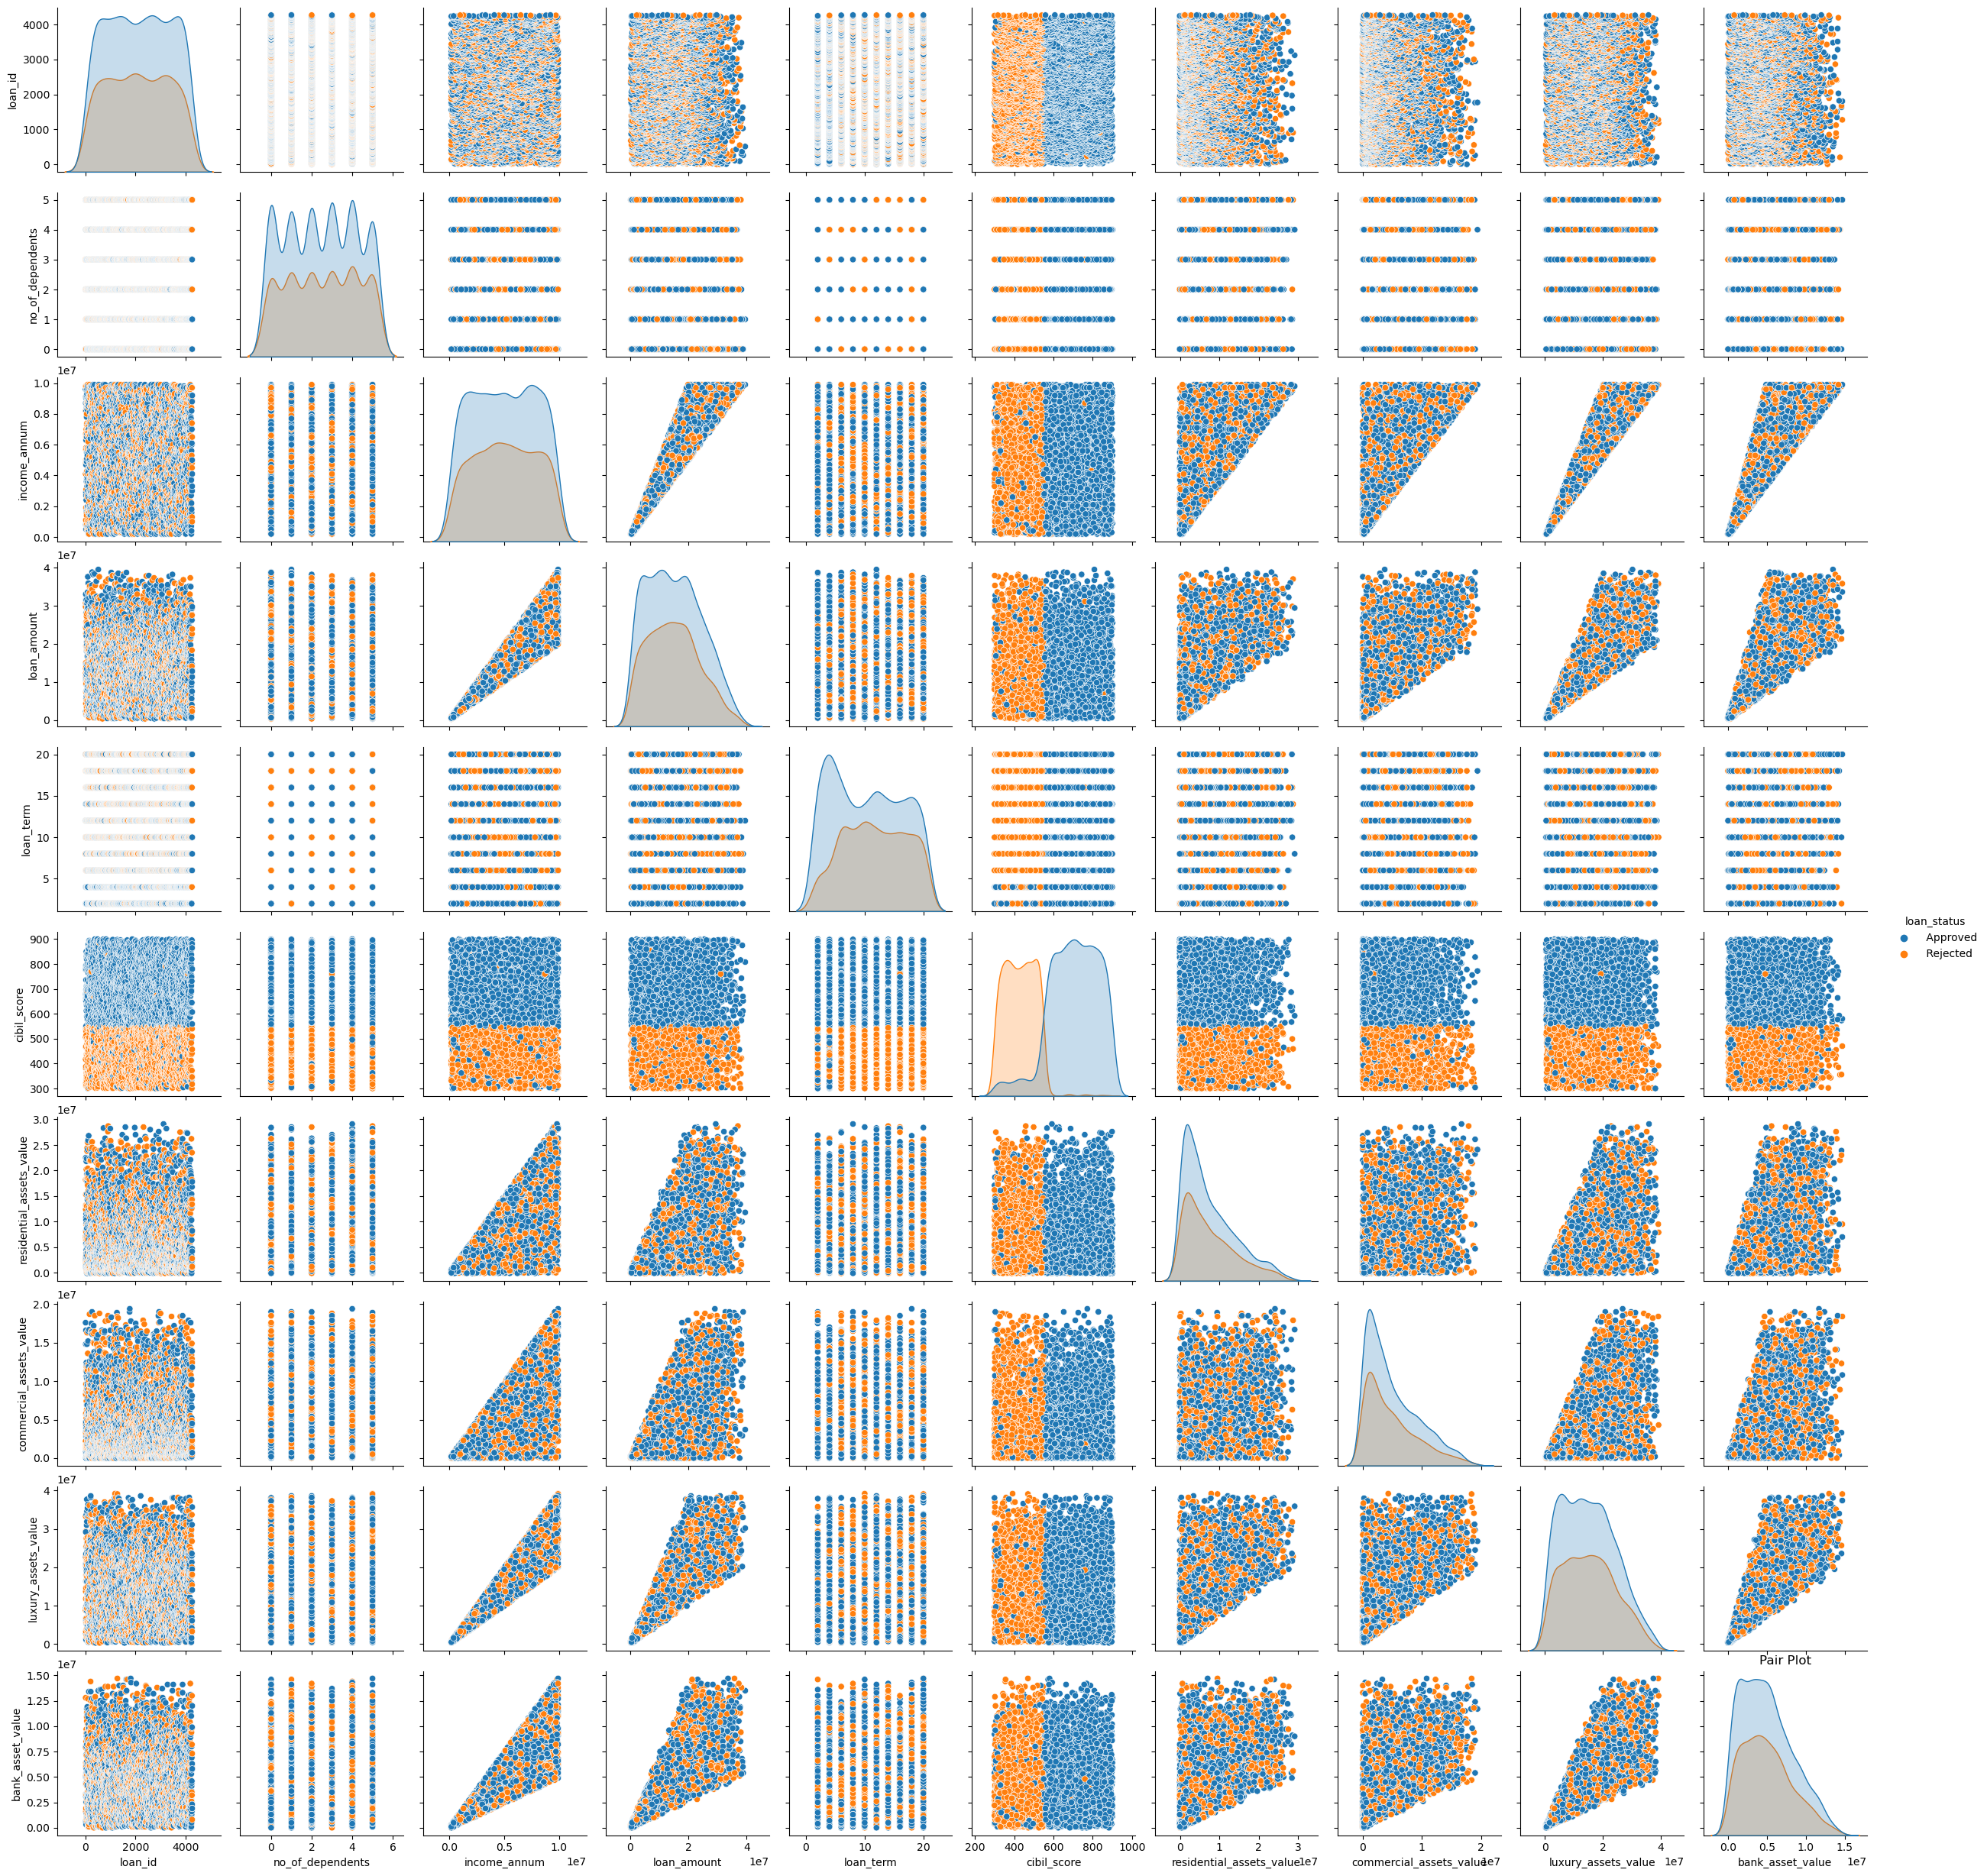

In [8]:
sns.pairplot(data, hue='loan_status')
plt.title('Pair Plot')
plt.show()

In [38]:
# Count of each unique value in 'education' column
print(data['education'].value_counts())

# Count of each unique value in 'self_employed' column
print(data['self_employed'].value_counts())

# Count of 'loan_status'
print(data['loan_status'].value_counts())

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64
 Yes    2150
 No     2119
Name: self_employed, dtype: int64
 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64


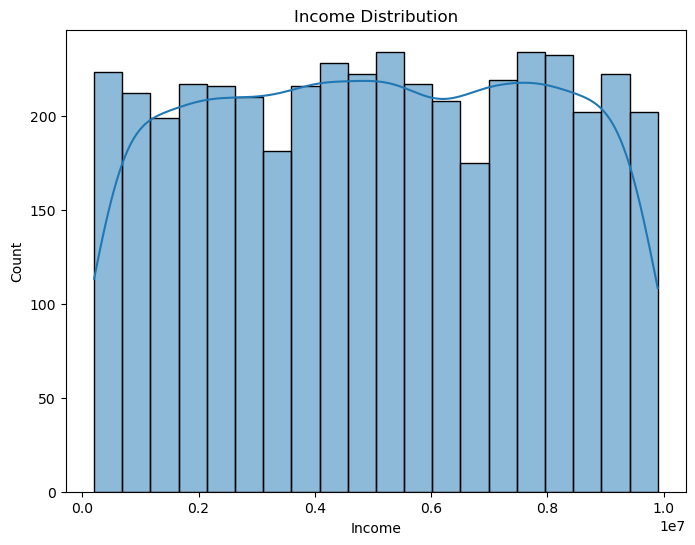

<Figure size 640x480 with 0 Axes>

In [100]:
# Distribution of 'income_annum'
plt.figure(figsize=(8, 6))
sns.histplot(data['income_annum'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()
#plt.savefig('IncomeDistribution.png', format='png')


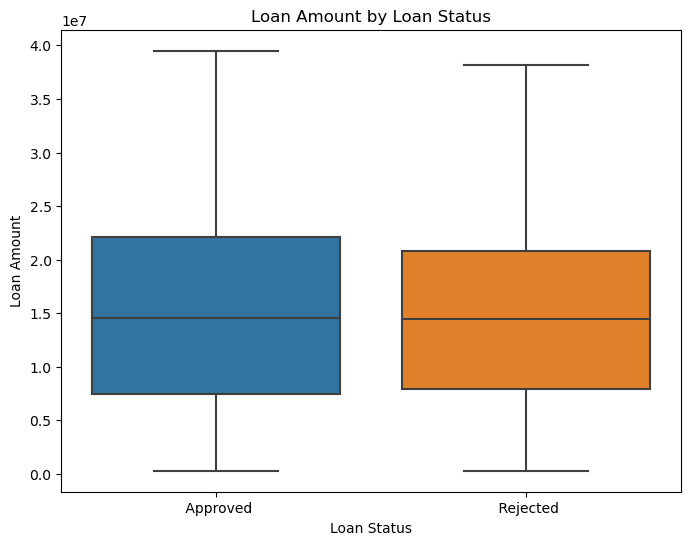

In [40]:
# Box plot for 'loan_amount' by 'loan_status'
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=data)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

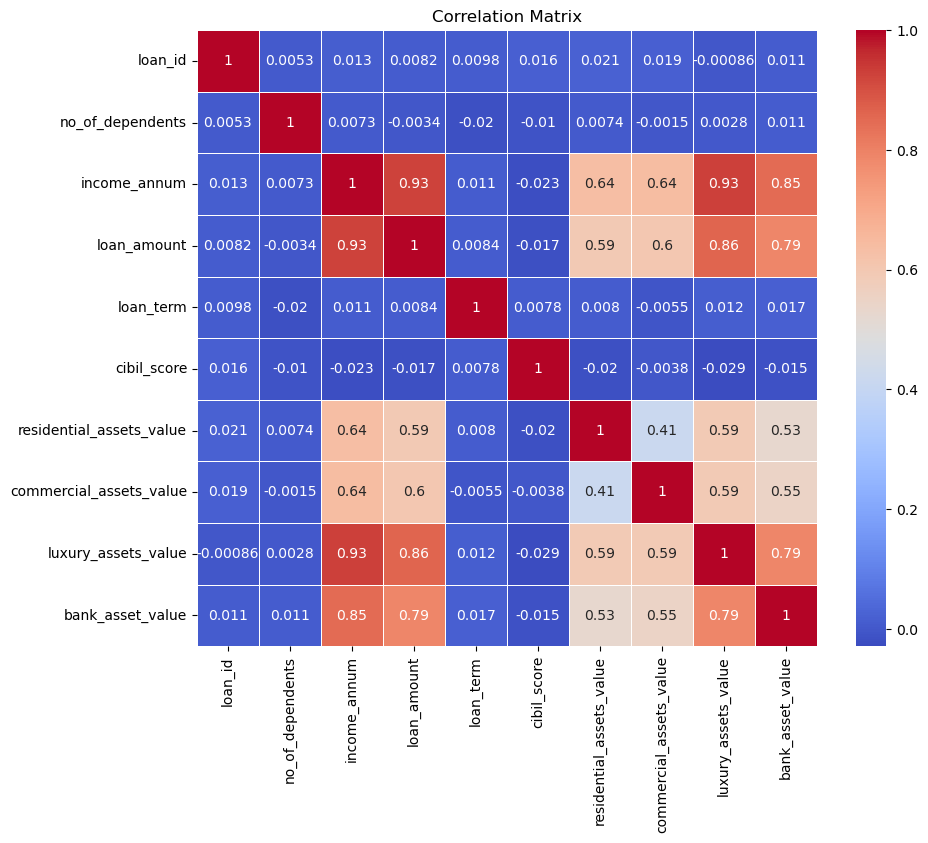

In [41]:
# Correlation matrix for numeric features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

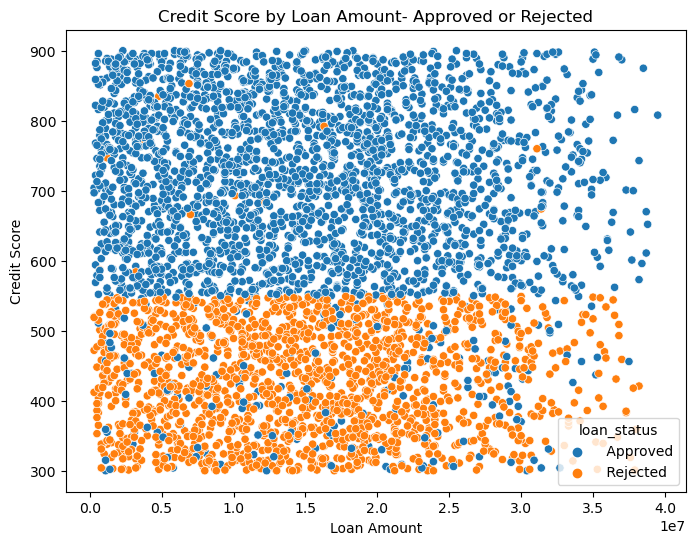

<Figure size 640x480 with 0 Axes>

In [99]:
# Looking at credit score and loan status
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loan_amount', y='cibil_score', hue='loan_status', data=data, legend='auto', markers=True)
plt.title('Credit Score by Loan Amount- Approved or Rejected')
plt.xlabel('Loan Amount')
plt.ylabel('Credit Score')
plt.show()
#plt.savefig('CSvLA_AorRPlot.png', format='png')


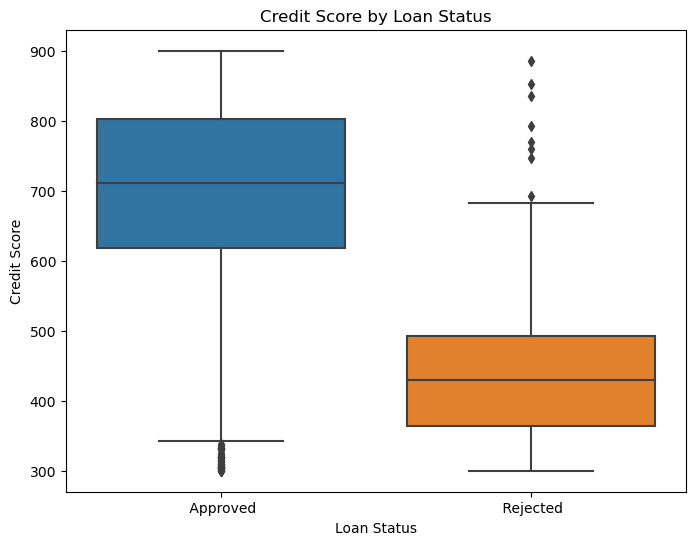

In [43]:
# Box plot for 'loan_amount' by 'loan_status'
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=data)
plt.title('Credit Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

In [98]:
import plotly.express as px

# Assuming you have your dataset loaded into a DataFrame named df

# Create the violin plot
fig = px.violin(data, x='loan_status', y='cibil_score', box=True, points="all")

# Customize the plot layout and appearance (optional)
fig.update_layout(
    title="Credit Score Distribution by Loan Status",
    xaxis_title="Loan Status",
    yaxis_title="Credit Score",
)

# Show the interactive plot

fig.show()

<Figure size 640x480 with 0 Axes>

## Process the Data

In [44]:
# Split target column from dataset
y = data['loan_status']
X = data.drop(columns='loan_status')

In [45]:
# Preview the data
X[:5]

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  
0                 17600000             22700000           8000000  
1                  2200000              8800000           3300000  
2                  4500000             33300000          12800000  
3                  3300000             23300000           7900000  
4                  8200000             29400000           5000000

In [46]:
# Print first five entries for target
y[:5]

0     Approved
1     Rejected
2     Rejected
3     Rejected
4     Rejected
Name: loan_status, dtype: object

In [47]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [48]:
# Preview the data
X.head()

loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        1                 2       9600000     29900000         12   
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
4        5                 5       9800000     24200000         20   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
4          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  education_ Graduate  \
0             22700000           8000000                    1   
1              8800000           3300000                    0   
2             33300000          12800000                    1   
3             23300000           7900000                    1   
4             29400000           5000000                    0   

   education_ Not Graduate  self_employed_ No  self_employed_ Yes  
0                        0                  1                   0  
1                        1                  0                   1  
2                        0                  1                   0  
3                        0                  1                   0  
4                        1                  0                   1

## Test Machine Learning Model

In [75]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train.shape

(3415, 14)

In [77]:
X_test.shape

(854, 14)

In [90]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate the model with k = 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

In [92]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [93]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([' Rejected', ' Approved', ' Rejected', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Rejected',
       ' Rejected', ' Rejected', ' Rejected', ' Rejected', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Rejected', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Rejected', ' Rejected', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Rejected', ' Approved',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Approved', ' App

In [94]:
from sklearn.metrics import confusion_matrix,classification_report
# Print confusion matrix
conf_matrix= confusion_matrix(y_pred,y_test)
conf_matrix

array([[480,  45],
       [ 56, 273]], dtype=int64)

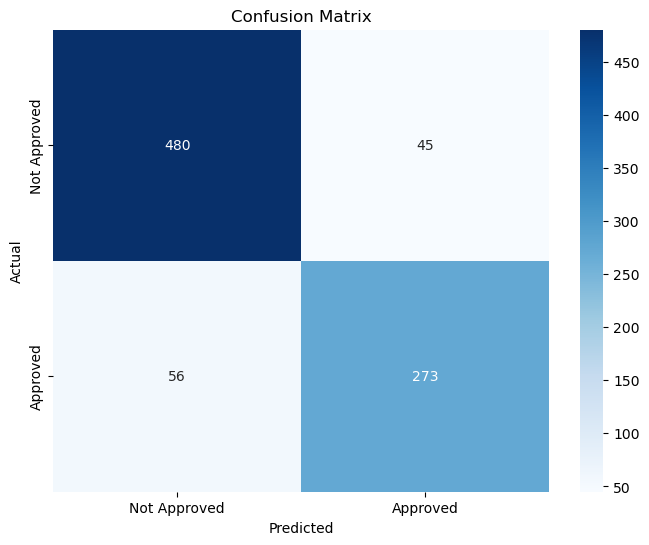

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#plt.savefig('ConfusionMatrix.png', format='png')

In [96]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Approved       0.90      0.91      0.90       525
    Rejected       0.86      0.83      0.84       329

    accuracy                           0.88       854
   macro avg       0.88      0.87      0.87       854
weighted avg       0.88      0.88      0.88       854

